<a href="https://colab.research.google.com/github/smorenorod/Python-Codes/blob/main/Case_Study_Publicis_Sapient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from six import StringIO
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy/score calculation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_df=pd.read_csv('/content/drive/MyDrive/DS_Adult_Autism_Data.csv')

In [5]:
data_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,f,NaN,no,no,Egypt,no,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,25.0,f,White-European,no,no,Russia,no,'18 and more',Self,YES
700,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,34.0,m,Hispanic,no,no,Mexico,no,'18 and more',Parent,NO
701,1.0,0.0,1.0,1.0,1,0.0,1.0,1.0,0.0,1.0,24.0,f,NaN,no,no,Russia,no,'18 and more',NaN,YES
702,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,1.0,1.0,35.0,m,'South Asian',no,no,Pakistan,no,'18 and more',Self,NO


#Data Quality

In [7]:
#Missing data
missing = data_df.isnull().sum()/data_df.shape[0]*100
missing.sort_values(ascending=False)

#proportion lower than 15% could be use imputatiom

,0
Ethnicity,14.204545
Relation,13.778409
Age,0.852273
Family,0.710227
A7_Score,0.710227
Age_desc,0.568182
Country_of_res,0.568182
Jundice,0.568182
A1_Score,0.568182
A2_Score,0.426136


In [14]:
#checking features that could be constrant
print(data_df['Used_app_before'].value_counts(normalize=True).reset_index(),"\n")
print( data_df['Age_desc'].value_counts(normalize=True).reset_index())

  Used_app_before  proportion
0              no    0.982882
1             yes    0.017118 

        Age_desc  proportion
0  '18 and more'         1.0


### Excluding Age_desc since is constant

In [15]:
data_df.drop(['Age_desc'],axis=1,inplace=True)

In [16]:
data_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,White-European,no,no,'United States',no,Self,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,Latino,no,yes,Brazil,no,Self,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,Latino,yes,yes,Spain,no,Parent,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,White-European,no,yes,'United States',no,Self,NO
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,f,NaN,no,no,Egypt,no,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,25.0,f,White-European,no,no,Russia,no,Self,YES
700,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,34.0,m,Hispanic,no,no,Mexico,no,Parent,NO
701,1.0,0.0,1.0,1.0,1,0.0,1.0,1.0,0.0,1.0,24.0,f,NaN,no,no,Russia,no,NaN,YES
702,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,1.0,1.0,35.0,m,'South Asian',no,no,Pakistan,no,Self,NO


## Checking Target variable distirbution

In [17]:
#barplot
# Calcular la frecuencia y el Percentage de cada categoria
frecuencias = data_df['ASD'].value_counts(normalize=True).reset_index()
frecuencias.columns = ['ASD', 'Percentage']

# to Percentage
frecuencias['Percentage'] = frecuencias['Percentage'] * 100

# barplot Percentages
fig = px.bar(frecuencias, x='ASD', y='Percentage', title="Percentage ASD", text='Percentage')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis_title="Percentage (%)", xaxis_title="ASD")
fig.show()


### Claseses are umbalanced so it will be needed to use some balancing techniques

In [22]:
fig = px.box(data_df, y="Age", title="Box Plot Example")
fig.show()

In [28]:
# Age=383  will be replaced with missing data to be imputed during the preprocessing phase

data_df["Age"]=data_df["Age"].replace(383, np.nan)

In [29]:
fig = px.box(data_df, y="Age", title="Box Plot Example")
fig.show()

# Categorical and Numerical variables split

In [18]:
#Categorical
cat_columns=["A1_Score",	"A2_Score",	"A3_Score",	"A4_Score",	"A5_Score",	"A6_Score",	"A7_Score",
             "A8_Score",	"A9_Score",	"A10_Score", "Gender", "Ethnicity",	"Jundice",	"Family",
             "Country_of_res",	"Used_app_before", "Relation"	]

cat_df=data_df[cat_columns]
cat_df.shape

(704, 17)

In [19]:
# numerical
cuant_columns=["Age"]

cuant_df=data_df[cuant_columns]
cuant_df.shape

(704, 1)

# preprocessing pipeline

In [31]:
#pipeline

# Categorical

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #imputar con la categoria mas frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  #onehot encodign para trasformar variables categoricas
    ])

# numerical

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median') ),  #imputar con la mediana
    (('scl', StandardScaler())), #trasforamcion de yeo-johnson 'box-cox' ( 'box-cox' admite solo valores >0) para lidiar con atipicos y luego estandarizar
    ])


#Pipeline with all variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_columns),
        ('num', num_transformer, cuant_columns)])


In [33]:
#train/test split
X = data_df.drop(['ASD'], axis=1).reset_index(drop=True)


#  LabelEncoder
label_encoder = LabelEncoder()

# encode target variable
Y = label_encoder.fit_transform(data_df['ASD'].reset_index(drop=True))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# DecisionTreeClassifier Using Oversampling

In [36]:
from imblearn.pipeline import Pipeline

In [37]:
# preprocessor + over sampling + classifier

tree_clasif = Pipeline(steps=[('preprocessor', preprocessor),
                      ('smote', SMOTE(random_state=42)),
                      ('classifier', DecisionTreeClassifier(class_weight=None,criterion="entropy"))])

### Good accuracy that may be inglfated do to the umbalced calsses, F1 is bringing a more real measure of the model performance

In [38]:
# training clasifier
clasif = tree_clasif.fit(X_train, y_train)

# prediction
y_pred = clasif.predict(X_test)

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# F1 score due to umbalaced class.
print("f1_score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8915094339622641
f1_score: 0.7964601769911505


### Variables importances on the tree clasification

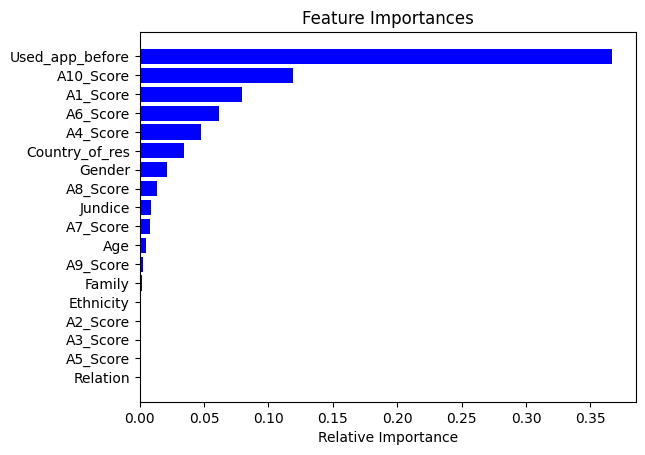

In [49]:
# Access the DecisionTreeClassifier within the pipeline
feature=list(X_train.columns.values)
importances = clasif.named_steps['classifier'].feature_importances_

indices = np.argsort(importances)

# Ensure that indices are within the valid range of feature list
indices = indices[indices < len(feature)]  # Filter out indices that are out of range

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Grid search will show a combination of hyper parameters that will improve f1 score

In [42]:
#Gridd search + DecisionTreeClassifier

#hyperparameters space
parameter_space = {
    'classifier__max_depth':range(3,20) #[(60+5*i, ) for i in range(10)],

}

# Perform cross-validation with grid search using F1 as the evaluation metric
grid = GridSearchCV(clasif, parameter_space, n_jobs=-1, cv=5, scoring='f1')
grid.fit(X_train, y_train)

#best parameters
print('Grid best parameter: ', grid.best_params_)
print('Grid best f1: ', grid.best_score_)

grid_pred = grid.predict(X_test)


Grid best parameter:  {'classifier__max_depth': 10}
Grid best f1:  0.8533243530662885


### A high F1 score is achieved with a max depth of 10 in the tree

# SVM Using Oversampling

In [41]:
#SVM

# preprocessor + over sampling + classifier


clasif_2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('smote', SMOTE(random_state=42)),
                      ('classifier', svm.SVC(kernel='rbf', decision_function_shape='ovr',max_iter=1000))])



# training clasifier SVM
clasif_2 = clasif_2.fit(X_train, y_train)

# prediction
y_pred = clasif_2.predict(X_test)

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# F1 score due to umbalaced class.
print("f1_score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9905660377358491
f1_score: 0.9827586206896551


### An even higher accuracy is obtained with a support vector machine classifier. Although accuracy is inflated, the F1 score remains very good.

In [43]:
#Gridd search + DecisionTreeClassifier

#hyperparameters space
parameter_space = {
    'classifier__kernel': ['linear', 'rbf'],  # Different types of kernels
    'classifier__C': [0.1, 1, 10, 100]   # Regularization parameter
}

# Perform cross-validation with grid search using F1 as the evaluation metric
grid = GridSearchCV(clasif_2, parameter_space, n_jobs=-1, cv=5, scoring='f1')
grid.fit(X_train, y_train)


#best parameters
print('Grid best parameter: ', grid.best_params_)
print('Grid best f1: ', grid.best_score_)

grid_pred = grid.predict(X_test)


Grid best parameter:  {'classifier__C': 1, 'classifier__kernel': 'linear'}
Grid best f1:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



### With a linear kernel and a regularization parameter of 1, the fit is perfect. However, it is important to monitor model performance with new data

#Key Takeaways



* Both tested models, decision trees and SVM, provide good performance in classifying the presence of Autism Spectrum Disorder (ASD); however, SVM demonstrates superior performance.

* Nonetheless, if interpretability and understanding the influence of variables in classification are priorities, decision trees may be preferred, sacrificing some performance in favor of insights into the relationship between ASD and the measured variables.

